In [1]:
%cd '/mnt/scratch-lustre/horlaville/clara_limlam/limCode2020-master_clara_2/'

/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{tgheros}\\usepackage{sansmath}\\sansmath'

In [3]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [4]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'alpha0': -1.412,
 'gamma0': 0.31,
 'BehrooziFile': 'sfr_reinterp.dat'},
            dnu = 2.8*u.GHz,
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            tobs = 40000*u.h,
            Omega_field = 4*u.deg**2,
            catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz')

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


# my own beam function

In [5]:
def own_noise(m, sign, sigm, pix=1.):
    
    '''
    m is the limlam object
    sign is the 3D cube of intensities (signal)
    sigm is the noise level
    pix is the pixelization blurring desired. default is 1.
    '''
    
    sm_map = gaussian_filter(sign, [pix, pix, 0])
    noise_sigma  = sigm
    noise_map    = np.random.normal(0, 
                                    noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m.nuObs)).value,
                                    sign.shape)
    # print(noise_sigma.to(u.Jy/u.sr).value)
    sm_noise_map = sm_map + noise_map
    
    return sm_noise_map

# let's check that it works correctly

In [6]:
sig = m_cii.maps

Loading .npz catalogues...


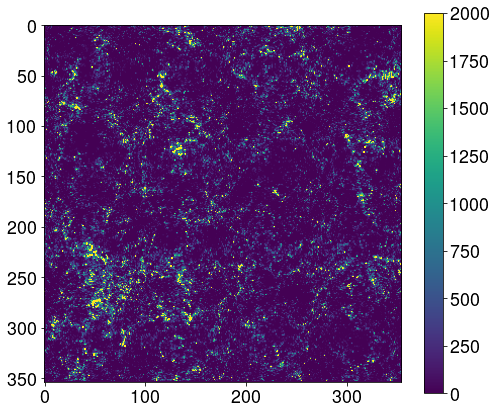

In [13]:
plt.imshow(sig[:, :, 1], vmax = 2000)
plt.colorbar()

In [22]:
beam_sig = own_noise(m = m_cii,
                     sign = sig,
                     sigm = 0*u.Jy/u.sr,
                     pix = .5)

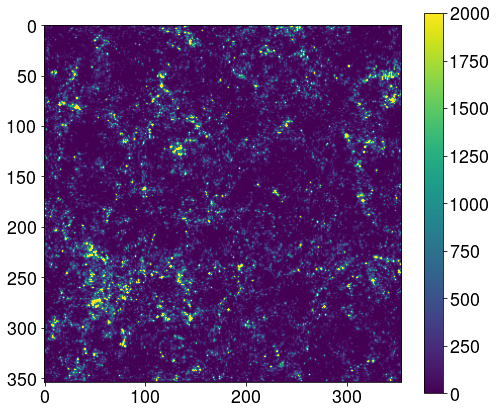

In [23]:
plt.imshow(beam_sig[:, :, 1], vmax = 2000)
plt.colorbar()

# it (seems to) work correctly !

# now, take the ancient signal cubes, scale them up by 1.23

In [24]:
sc = 1.23

In [25]:
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)

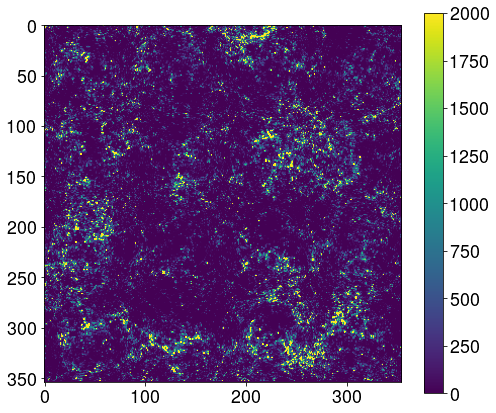

In [29]:
plt.imshow(sig[:, :, 1], vmax = 2000)
plt.colorbar()

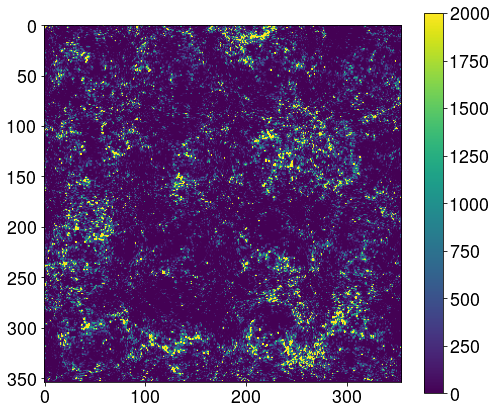

In [30]:
plt.imshow(scsig[:, :, 1], vmax = 2000)
plt.colorbar()

# again, nothing weird, all seems good

# next, beam those signal cubes up. start with pix = 0.5

In [31]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)

# for zdex = 0.3:

In [32]:
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)

In [35]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)

# for zdex = 0.5

In [36]:
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)

In [37]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)

# now, plot histograms, and compute dsrel

In [39]:
beam_binning = np.logspace(-1, np.log10(3*(10**4)), 50)
beam_center = (beam_binning[:-1] + beam_binning[1:]) / 2

In [40]:
beam05_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam05_zdex03[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')


beam05_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam05_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')
    

    
beam05_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam05_zdex05[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')

# loading up histograms

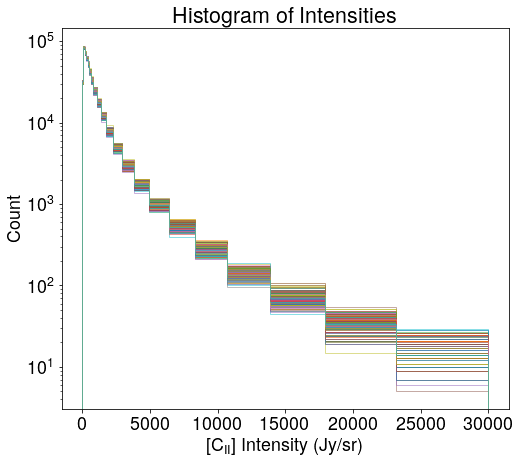

In [46]:
nb_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex03[i], _, _ = plt.hist(beam05_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

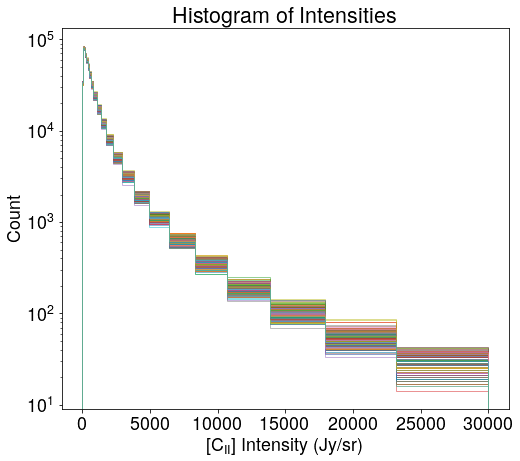

In [47]:
nb_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex04[i], _, _ = plt.hist(beam05_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

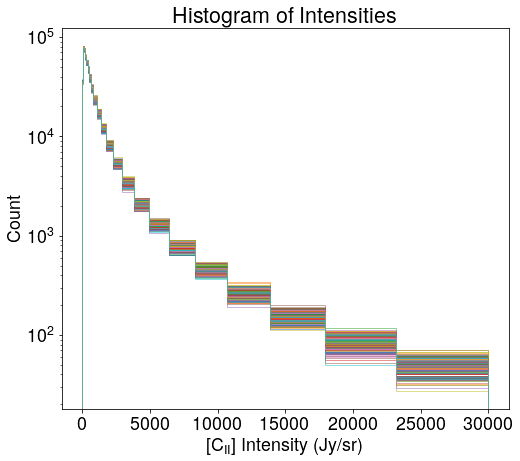

In [48]:
nb_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex05[i], _, _ = plt.hist(beam05_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [49]:
avgb_zdex03 = np.mean(nb_zdex03, axis = 0)
avgb_zdex04 = np.mean(nb_zdex04, axis = 0)
avgb_zdex05 = np.mean(nb_zdex05, axis = 0)

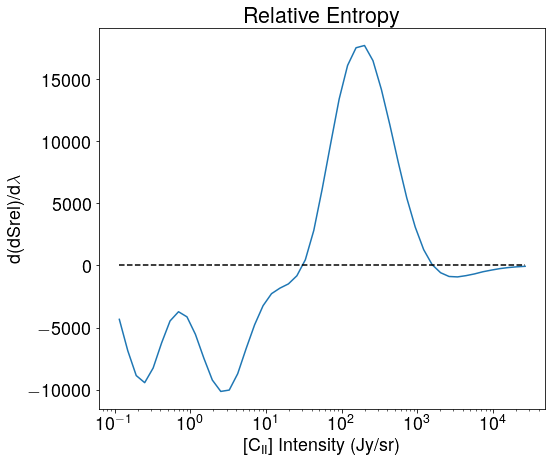

In [65]:
plt.plot(beam_center, - avgb_zdex04*(np.log10(avgb_zdex05/avgb_zdex04) - np.log10(avgb_zdex03/avgb_zdex04))/0.2)

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\lambda$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

In [66]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/beam_center.npy', beam_center)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_basis.npy', avgb_zdex04)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_zdex0-3.npy', avgb_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_zdex0-5.npy', avgb_zdex05)

# repeat for pix scale = 1, 1.5, 2:

# pix scale = 1

In [52]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)

In [53]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)

In [54]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)

# pix = 1.5

In [55]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)

In [56]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)

In [57]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)

# pix = 2

In [58]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

In [59]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

In [60]:
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

# making dsrel

In [73]:
beam1_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam1_zdex03[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/1_pix/cii_beam'+str(i)+'.npy')


beam1_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam1_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1_pix/cii_beam'+str(i)+'.npy')
    

    
beam1_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam1_zdex05[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/1_pix/cii_beam'+str(i)+'.npy')

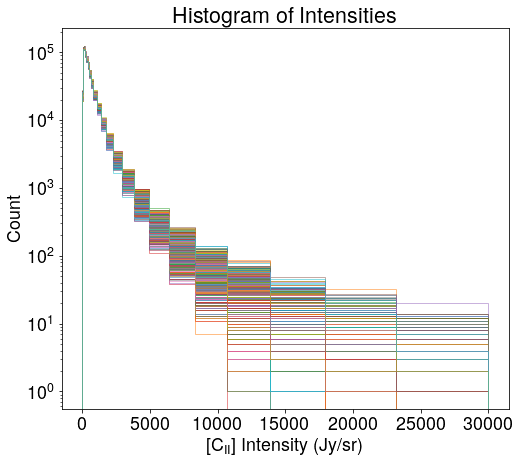

In [74]:
nb1_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_zdex03[i], _, _ = plt.hist(beam1_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_zdex04[i], _, _ = plt.hist(beam1_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_zdex05[i], _, _ = plt.hist(beam1_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [75]:
avgb1_zdex03 = np.mean(nb1_zdex03, axis = 0)
avgb1_zdex04 = np.mean(nb1_zdex04, axis = 0)
avgb1_zdex05 = np.mean(nb1_zdex05, axis = 0)

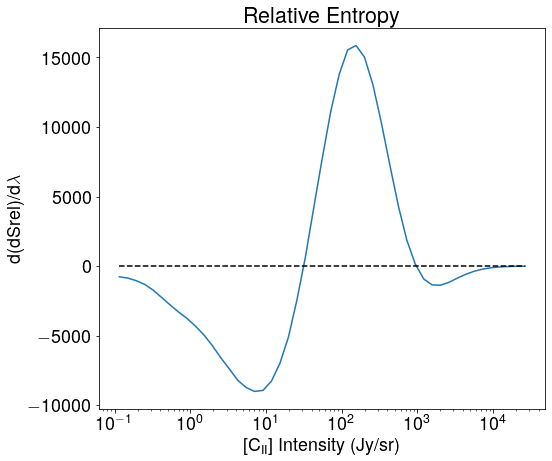

In [76]:
plt.plot(beam_center, - avgb1_zdex04*(np.log10(avgb1_zdex05/avgb1_zdex04) - np.log10(avgb1_zdex03/avgb1_zdex04))/0.2)

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\lambda$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

In [77]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/beam_center.npy', beam_center)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_basis.npy', avgb1_zdex04)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_zdex0-3.npy', avgb1_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_zdex0-5.npy', avgb1_zdex05)

# pix 1.5

In [80]:
beam15_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam15_zdex03[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')


beam15_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam15_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')
    

    
beam15_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam15_zdex05[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')

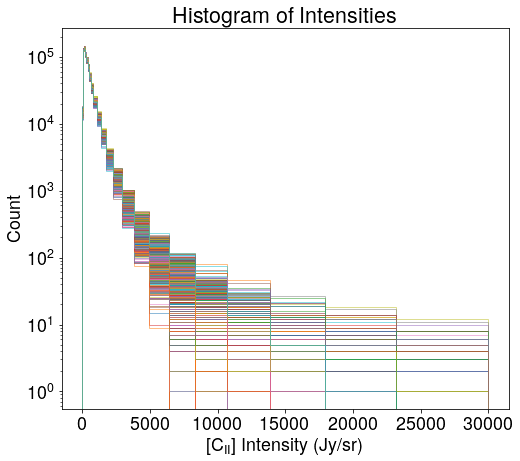

In [81]:
nb15_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_zdex03[i], _, _ = plt.hist(beam15_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_zdex04[i], _, _ = plt.hist(beam15_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_zdex05[i], _, _ = plt.hist(beam15_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [82]:
avgb15_zdex03 = np.mean(nb15_zdex03, axis = 0)
avgb15_zdex04 = np.mean(nb15_zdex04, axis = 0)
avgb15_zdex05 = np.mean(nb15_zdex05, axis = 0)

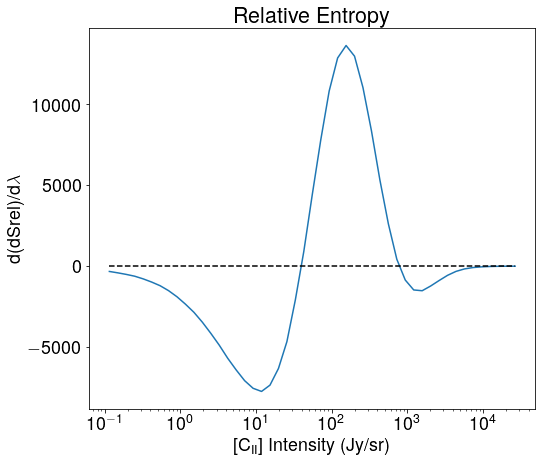

In [83]:
plt.plot(beam_center, - avgb15_zdex04*(np.log10(avgb15_zdex05/avgb15_zdex04) - np.log10(avgb15_zdex03/avgb15_zdex04))/0.2)

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\lambda$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

In [84]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/beam_center.npy', beam_center)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_basis.npy', avgb15_zdex04)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_zdex0-3.npy', avgb15_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_zdex0-5.npy', avgb15_zdex05)

# pix = 2

In [ ]:
beam2_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam2_zdex03[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam_debug/2_pix/cii_beam'+str(i)+'.npy')


beam2_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam2_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/2_pix/cii_beam'+str(i)+'.npy')
    

    
beam2_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam2_zdex05[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam_debug/2_pix/cii_beam'+str(i)+'.npy')

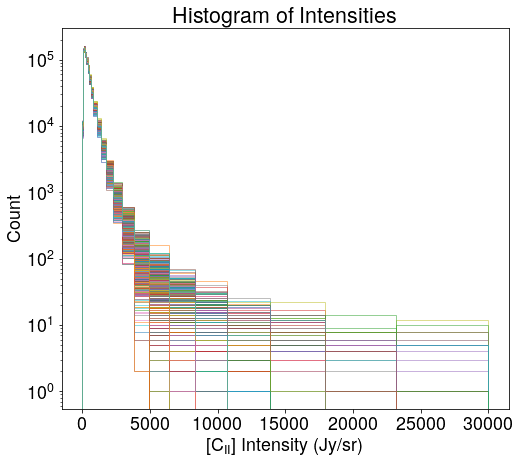

In [86]:
nb2_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_zdex03[i], _, _ = plt.hist(beam2_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_zdex04[i], _, _ = plt.hist(beam2_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_zdex05[i], _, _ = plt.hist(beam2_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [87]:
avgb2_zdex03 = np.mean(nb2_zdex03, axis = 0)
avgb2_zdex04 = np.mean(nb2_zdex04, axis = 0)
avgb2_zdex05 = np.mean(nb2_zdex05, axis = 0)

/tmp/ipykernel_493576/3642232151.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beam_center, - avgb00_zdex04*(np.log10(avgb00_zdex05/avgb00_zdex04) - np.log10(avgb00_zdex03/avgb00_zdex04))/0.2, label='pix=0')
/tmp/ipykernel_493576/3642232151.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - avgb00_zdex04*(np.log10(avgb00_zdex05/avgb00_zdex04) - np.log10(avgb00_zdex03/avgb00_zdex04))/0.2, label='pix=0')
/tmp/ipykernel_493576/3642232151.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(beam_center, - avgb00_zdex04*(np.log10(avgb00_zdex05/avgb00_zdex04) - np.log10(avgb00_zdex03/avgb00_zdex04))/0.2, label='pix=0')


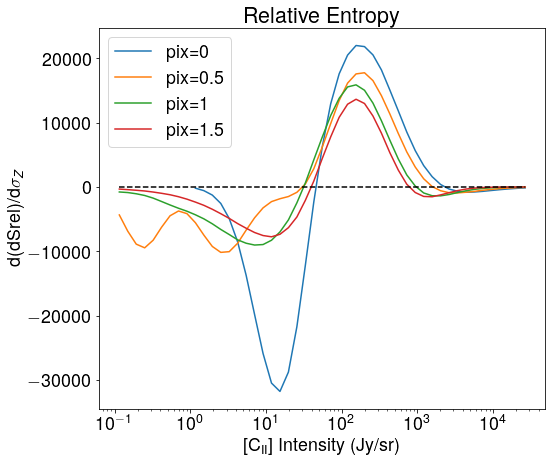

In [126]:
plt.plot(beam_center, - avgb00_zdex04*(np.log10(avgb00_zdex05/avgb00_zdex04) - np.log10(avgb00_zdex03/avgb00_zdex04))/0.2, label='pix=0')
plt.plot(beam_center, - avgb_zdex04*(np.log10(avgb_zdex05/avgb_zdex04) - np.log10(avgb_zdex03/avgb_zdex04))/0.2, label='pix=0.5')
plt.plot(beam_center, - avgb1_zdex04*(np.log10(avgb1_zdex05/avgb1_zdex04) - np.log10(avgb1_zdex03/avgb1_zdex04))/0.2, label = 'pix=1')
plt.plot(beam_center, - avgb15_zdex04*(np.log10(avgb15_zdex05/avgb15_zdex04) - np.log10(avgb15_zdex03/avgb15_zdex04))/0.2, label='pix=1.5')
#plt.plot(beam_center, - avgb2_zdex04*(np.log10(avgb2_zdex05/avgb2_zdex04) - np.log10(avgb2_zdex03/avgb2_zdex04))/0.2, label='pix=2')

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\sigma_Z$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

In [89]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/beam_center.npy', beam_center)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_basis.npy', avgb2_zdex04)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_zdex0-3.npy', avgb2_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_zdex0-5.npy', avgb2_zdex05)

In [127]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_zdex0-3.npy', avgb00_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_zdex0-5.npy', avgb00_zdex05)

In [120]:
# 0 pix
beam00_zdex03 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_zdex03[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/sig/cii_sig'+str(i)+'.npy')


beam00_zdex04 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    
beam00_zdex05 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_zdex05[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/sig/cii_sig'+str(i)+'.npy')

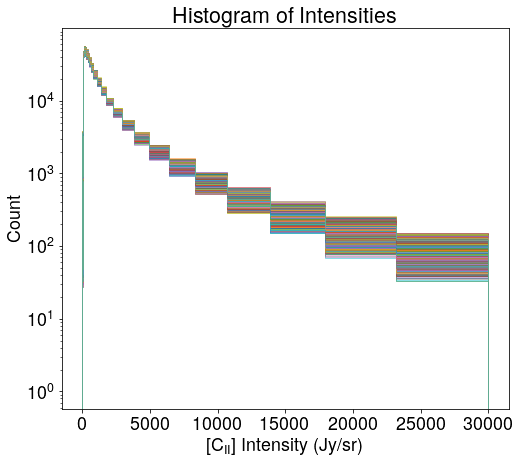

In [121]:
nb00_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_zdex03[i], _, _ = plt.hist(beam00_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_zdex04[i], _, _ = plt.hist(beam00_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_zdex05[i], _, _ = plt.hist(beam00_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [122]:
avgb00_zdex03 = np.mean(nb00_zdex03, axis = 0)
avgb00_zdex04 = np.mean(nb00_zdex04, axis = 0)
avgb00_zdex05 = np.mean(nb00_zdex05, axis = 0)

# now for alpha_cii:

alpha_cii = 0.20

In [90]:
# scaled signal
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)


# 0.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 2 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

alpha_cii = 0.28

In [91]:
# scaled signal
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)


# 0.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 2 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

# loading histograms

In [114]:
# 0 pix
beam00_alpha20 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_alpha20[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')


beam00_alpha24 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_alpha24[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    
beam00_alpha28 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_alpha28[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')

In [92]:
# 0.5 pix
beam05_alpha20 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_alpha20[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')


beam05_alpha24 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_alpha24[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')
    
    
beam05_alpha28 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_alpha28[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')
    

# 1 pix
beam1_alpha20 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_alpha20[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/1_pix/cii_beam'+str(i)+'.npy')


beam1_alpha24 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_alpha24[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1_pix/cii_beam'+str(i)+'.npy')
    
    
beam1_alpha28 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_alpha28[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/1_pix/cii_beam'+str(i)+'.npy')
    
    
# 1.5 pix
beam15_alpha20 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_alpha20[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')


beam15_alpha24 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_alpha24[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')
    
    
beam15_alpha28 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_alpha28[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')

# 2 pix
beam2_alpha20 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_alpha20[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam_debug/2_pix/cii_beam'+str(i)+'.npy')


beam2_alpha24 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_alpha24[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/2_pix/cii_beam'+str(i)+'.npy')
    
    
beam2_alpha28 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_alpha28[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam_debug/2_pix/cii_beam'+str(i)+'.npy')

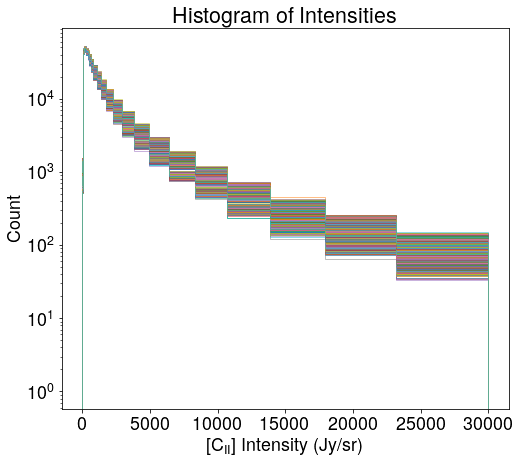

In [115]:
nb00_alpha20 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_alpha20[i], _, _ = plt.hist(beam00_alpha20[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_alpha24 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_alpha24[i], _, _ = plt.hist(beam00_alpha24[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_alpha28 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_alpha28[i], _, _ = plt.hist(beam00_alpha28[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

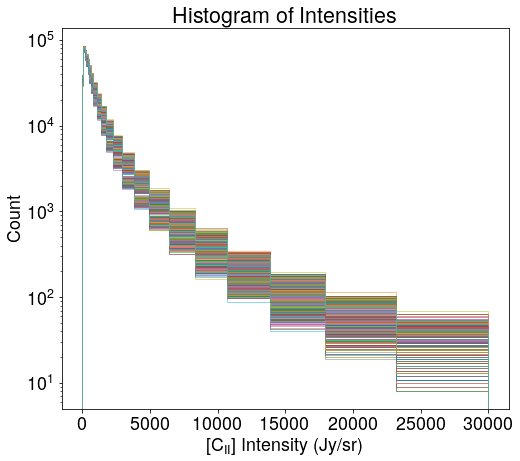

In [93]:
nb05_alpha20 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_alpha20[i], _, _ = plt.hist(beam05_alpha20[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb05_alpha24 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_alpha24[i], _, _ = plt.hist(beam05_alpha24[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb05_alpha28 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_alpha28[i], _, _ = plt.hist(beam05_alpha28[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

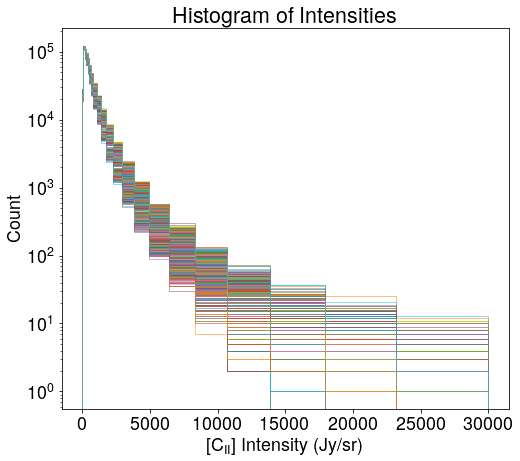

In [94]:
nb1_alpha20 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_alpha20[i], _, _ = plt.hist(beam1_alpha20[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_alpha24 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_alpha24[i], _, _ = plt.hist(beam1_alpha24[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_alpha28 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_alpha28[i], _, _ = plt.hist(beam1_alpha28[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

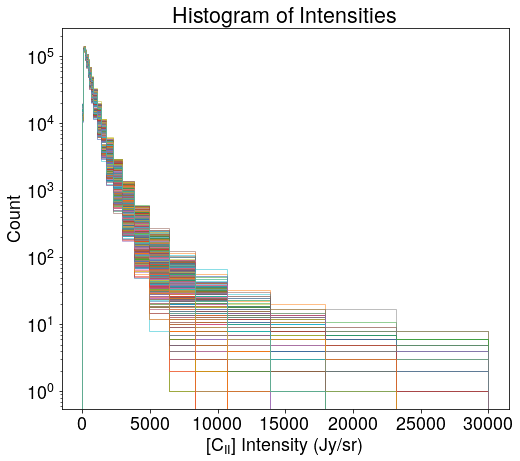

In [96]:
nb15_alpha20 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_alpha20[i], _, _ = plt.hist(beam15_alpha20[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_alpha24 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_alpha24[i], _, _ = plt.hist(beam15_alpha24[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_alpha28 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_alpha28[i], _, _ = plt.hist(beam15_alpha28[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

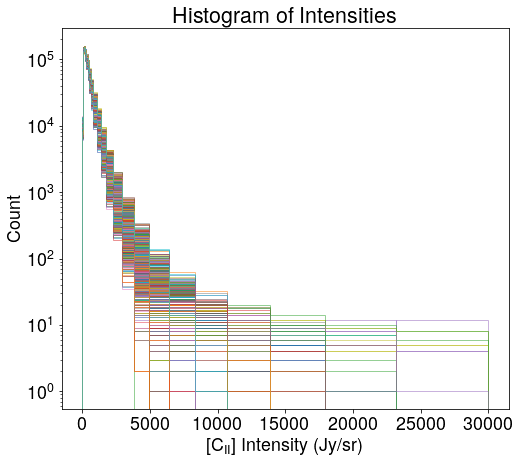

In [95]:
nb2_alpha20 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_alpha20[i], _, _ = plt.hist(beam2_alpha20[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_alpha24 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_alpha24[i], _, _ = plt.hist(beam2_alpha24[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_alpha28 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_alpha28[i], _, _ = plt.hist(beam2_alpha28[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [116]:
avgb00_alpha20 = np.mean(nb00_alpha20, axis = 0)
avgb00_alpha24 = np.mean(nb00_alpha24, axis = 0)
avgb00_alpha28 = np.mean(nb00_alpha28, axis = 0)

In [97]:
avgb05_alpha20 = np.mean(nb05_alpha20, axis = 0)
avgb05_alpha24 = np.mean(nb05_alpha24, axis = 0)
avgb05_alpha28 = np.mean(nb05_alpha28, axis = 0)

In [98]:
avgb1_alpha20 = np.mean(nb1_alpha20, axis = 0)
avgb1_alpha24 = np.mean(nb1_alpha24, axis = 0)
avgb1_alpha28 = np.mean(nb1_alpha28, axis = 0)

In [99]:
avgb15_alpha20 = np.mean(nb15_alpha20, axis = 0)
avgb15_alpha24 = np.mean(nb15_alpha24, axis = 0)
avgb15_alpha28 = np.mean(nb15_alpha28, axis = 0)

In [100]:
avgb2_alpha20 = np.mean(nb2_alpha20, axis = 0)
avgb2_alpha24 = np.mean(nb2_alpha24, axis = 0)
avgb2_alpha28 = np.mean(nb2_alpha28, axis = 0)

/tmp/ipykernel_493576/1542145696.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - avgb00_alpha24*(np.log10(avgb00_alpha28/avgb00_alpha24) - np.log10(avgb00_alpha20/avgb00_alpha24))/0.008, label = 'pix=0')
/tmp/ipykernel_493576/1542145696.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beam_center, - avgb00_alpha24*(np.log10(avgb00_alpha28/avgb00_alpha24) - np.log10(avgb00_alpha20/avgb00_alpha24))/0.008, label = 'pix=0')


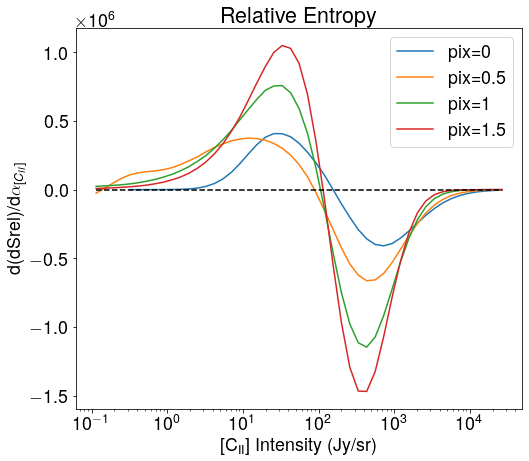

In [124]:
plt.plot(beam_center, - avgb00_alpha24*(np.log10(avgb00_alpha28/avgb00_alpha24) - np.log10(avgb00_alpha20/avgb00_alpha24))/0.008, label = 'pix=0')
plt.plot(beam_center, - avgb05_alpha24*(np.log10(avgb05_alpha28/avgb05_alpha24) - np.log10(avgb05_alpha20/avgb05_alpha24))/0.008, label = 'pix=0.5')
plt.plot(beam_center, - avgb1_alpha24*(np.log10(avgb1_alpha28/avgb1_alpha24) - np.log10(avgb1_alpha20/avgb1_alpha24))/0.008, label = 'pix=1')
plt.plot(beam_center, - avgb15_alpha24*(np.log10(avgb15_alpha28/avgb15_alpha24) - np.log10(avgb15_alpha20/avgb15_alpha24))/0.008, label = 'pix=1.5')
#plt.plot(beam_center, - avgb2_alpha24*(np.log10(avgb2_alpha28/avgb2_alpha24) - np.log10(avgb2_alpha20/avgb2_alpha24))/0.008, label = 'pix=2')

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\alpha_{[C_{II}]}$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

In [119]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/beam_center.npy', beam_center)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_acii0-020.npy', avgb00_alpha20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_basis.npy', avgb00_alpha24)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_acii0-028.npy', avgb00_alpha28)

In [106]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_acii0-020.npy', avgb05_alpha20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_acii0-028.npy', avgb05_alpha28)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_acii0-020.npy', avgb1_alpha20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_acii0-028.npy', avgb1_alpha28)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_acii0-020.npy', avgb15_alpha20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_acii0-028.npy', avgb15_alpha28)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_acii0-020.npy', avgb2_alpha20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_acii0-028.npy', avgb2_alpha28)

In [110]:
avgb0_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_zdex0-3.npy')
avgb0_zdex04 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_basis.npy')
avgb0_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_zdex0-5.npy')

avgb0_alpha20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_acii0-020.npy')
avgb0_alpha24 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_basis.npy')
avgb0_alpha28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_acii0-028.npy')

# alpha_MHI:

0.68

In [128]:
# scaled signal
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)


# 0.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 2 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

0.80

In [130]:
# scaled signal
for i in range(len(onlyfiles)):
    
    sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')    
    
    scsig = 1.23*sig
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy', scsig)


# 0.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = .5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/1_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 1.5 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 1.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy', scbeam)
    
# 2 pix beam
for i in range(len(onlyfiles)):
    
    scsig = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/scaled_sig/cii_sig'+str(i)+'.npy')    
    
    scbeam = own_noise(m = m_cii,
                       sign = scsig,
                       sigm = 0*u.Jy/u.sr,
                       pix = 2)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/2_pix/cii_beam'+str(i)+'.npy', scbeam)

In [131]:
# 0 pix
beam00_mhi68 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_mhi68[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')


beam00_mhi74 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_mhi74[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    
beam00_mhi80 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam00_mhi80[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    
# 0.5 pix
beam05_mhi68 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_mhi68[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')


beam05_mhi74 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_mhi74[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')
    
    
beam05_mhi80 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam05_mhi80[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/0-5_pix/cii_beam'+str(i)+'.npy')
    
    
# 1 pix
beam1_mhi68 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_mhi68[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/1_pix/cii_beam'+str(i)+'.npy')


beam1_mhi74 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_mhi74[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1_pix/cii_beam'+str(i)+'.npy')
    
    
beam1_mhi80 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam1_mhi80[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/1_pix/cii_beam'+str(i)+'.npy')
    
    
# 1.5 pix
beam15_mhi68 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_mhi68[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')


beam15_mhi74 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_mhi74[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')
    
    
beam15_mhi80 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam15_mhi80[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/1-5_pix/cii_beam'+str(i)+'.npy')
    
    
# 2 pix
beam2_mhi68 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_mhi68[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam_debug/2_pix/cii_beam'+str(i)+'.npy')


beam2_mhi74 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_mhi74[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam_debug/2_pix/cii_beam'+str(i)+'.npy')
    
    
beam2_mhi80 = [0 for i in range(len(onlyfiles))]
for i in range(len(onlyfiles)):
    beam2_mhi80[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam_debug/2_pix/cii_beam'+str(i)+'.npy')

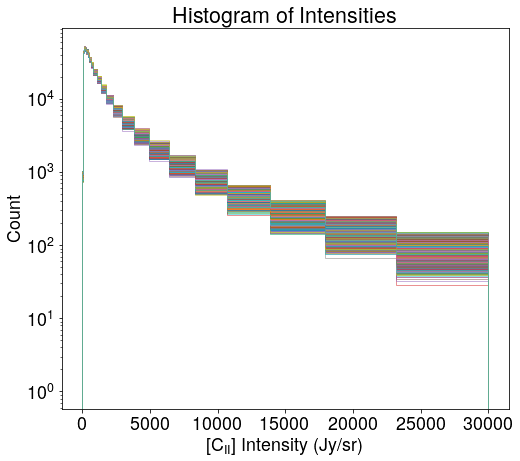

In [132]:
nb00_mhi68 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_mhi68[i], _, _ = plt.hist(beam00_mhi68[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_mhi74 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_mhi74[i], _, _ = plt.hist(beam00_mhi74[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb00_mhi80 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb00_mhi80[i], _, _ = plt.hist(beam00_mhi80[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

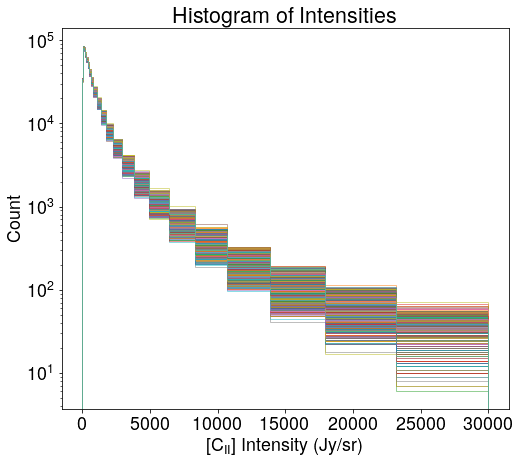

In [133]:
nb05_mhi68 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_mhi68[i], _, _ = plt.hist(beam05_mhi68[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb05_mhi74 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_mhi74[i], _, _ = plt.hist(beam05_mhi74[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb05_mhi80 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb05_mhi80[i], _, _ = plt.hist(beam05_mhi80[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

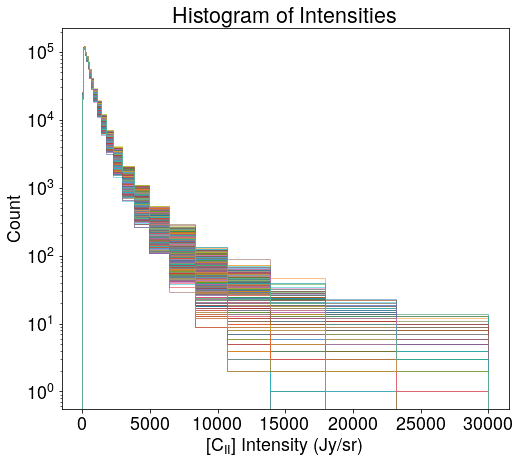

In [134]:
nb1_mhi68 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_mhi68[i], _, _ = plt.hist(beam1_mhi68[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_mhi74 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_mhi74[i], _, _ = plt.hist(beam1_mhi74[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb1_mhi80 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb1_mhi80[i], _, _ = plt.hist(beam1_mhi80[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

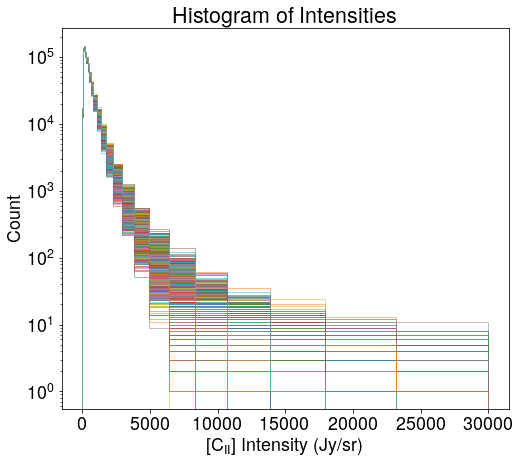

In [135]:
nb15_mhi68 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_mhi68[i], _, _ = plt.hist(beam15_mhi68[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_mhi74 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_mhi74[i], _, _ = plt.hist(beam15_mhi74[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb15_mhi80 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb15_mhi80[i], _, _ = plt.hist(beam15_mhi80[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

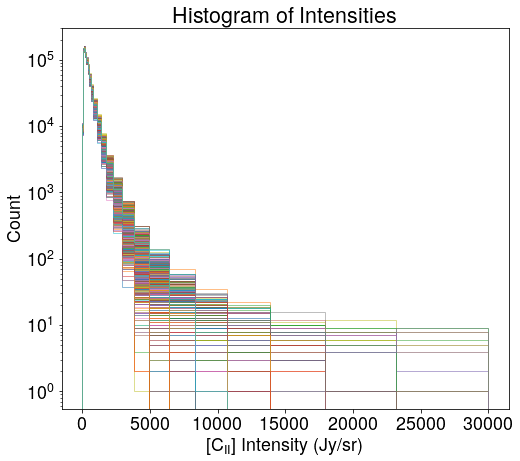

In [136]:
nb2_mhi68 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_mhi68[i], _, _ = plt.hist(beam2_mhi68[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_mhi74 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_mhi74[i], _, _ = plt.hist(beam2_mhi74[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')
    
nb2_mhi80 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb2_mhi80[i], _, _ = plt.hist(beam2_mhi80[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
    plt.ylabel(r'Count')
    plt.yscale('log')
    plt.title('Histogram of Intensities')

In [137]:
avgb00_mhi68 = np.mean(nb00_mhi68, axis = 0)
avgb00_mhi74 = np.mean(nb00_mhi74, axis = 0)
avgb00_mhi80 = np.mean(nb00_mhi80, axis = 0)

In [138]:
avgb05_mhi68 = np.mean(nb05_mhi68, axis = 0)
avgb05_mhi74 = np.mean(nb05_mhi74, axis = 0)
avgb05_mhi80 = np.mean(nb05_mhi80, axis = 0)

In [139]:
avgb1_mhi68 = np.mean(nb1_mhi68, axis = 0)
avgb1_mhi74 = np.mean(nb1_mhi74, axis = 0)
avgb1_mhi80 = np.mean(nb1_mhi80, axis = 0)

In [140]:
avgb15_mhi68 = np.mean(nb15_mhi68, axis = 0)
avgb15_mhi74 = np.mean(nb15_mhi74, axis = 0)
avgb15_mhi80 = np.mean(nb15_mhi80, axis = 0)

In [141]:
avgb2_mhi68 = np.mean(nb2_mhi68, axis = 0)
avgb2_mhi74 = np.mean(nb2_mhi74, axis = 0)
avgb2_mhi80 = np.mean(nb2_mhi80, axis = 0)

/tmp/ipykernel_493576/4171912386.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - avgb00_mhi74*(np.log10(avgb00_mhi80/avgb00_mhi74) - np.log10(avgb00_mhi68/avgb00_mhi74))/0.12, label = 'pix=0')


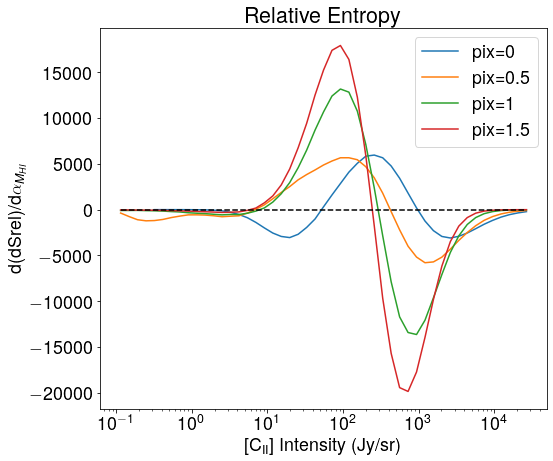

In [142]:
plt.plot(beam_center, - avgb00_mhi74*(np.log10(avgb00_mhi80/avgb00_mhi74) - np.log10(avgb00_mhi68/avgb00_mhi74))/0.12, label = 'pix=0')
plt.plot(beam_center, - avgb05_mhi74*(np.log10(avgb05_mhi80/avgb05_mhi74) - np.log10(avgb05_mhi68/avgb05_mhi74))/0.12, label = 'pix=0.5')
plt.plot(beam_center, - avgb1_mhi74*(np.log10(avgb1_mhi80/avgb1_mhi74) - np.log10(avgb1_mhi68/avgb1_mhi74))/0.12, label = 'pix=1')
plt.plot(beam_center, - avgb15_mhi74*(np.log10(avgb15_mhi80/avgb15_mhi74) - np.log10(avgb15_mhi68/avgb15_mhi74))/0.12, label = 'pix=1.5')
#plt.plot(beam_center, - avgb2_alpha24*(np.log10(avgb2_alpha28/avgb2_alpha24) - np.log10(avgb2_alpha20/avgb2_alpha24))/0.008, label = 'pix=2')

plt.xlabel(r'$\rm{[C_{II}]}$ Intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\alpha_{M_{HI}}$')
plt.title('Relative Entropy')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

In [143]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_mhi0-64.npy', avgb00_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_mhi0-80.npy', avgb00_mhi80)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_mhi0-64.npy', avgb05_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_mhi0-80.npy', avgb05_mhi80)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_mhi0-64.npy', avgb1_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_mhi0-80.npy', avgb1_mhi80)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_mhi0-64.npy', avgb15_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_mhi0-80.npy', avgb15_mhi80)

np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_mhi0-64.npy', avgb2_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/n_avg_mhi0-80.npy', avgb2_mhi80)